<a href="https://colab.research.google.com/github/eldorjonneymatov/fastai_learning_process/blob/master/notebooks/00_is_it_a_lamb_creating_a_model_from_your_own_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Is it a lamb?

## Step 1: Download images of lambs and non-lambs

In [ ]:
!pip install -Uqq duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 9.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [ ]:
urls = search_images('kid goat photos', max_images=1)
urls[0]

'http://cdn0.wideopenpets.com/wp-content/uploads/2017/04/AdobeStock_136343674.jpeg'

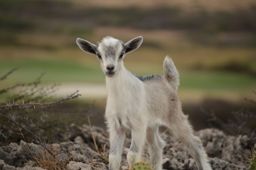

In [ ]:
from fastdownload import download_url
dest = "kid_goat.jpg"
download_url(urls[0], dest, show_progress=False)
from fastdownload import download_url

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

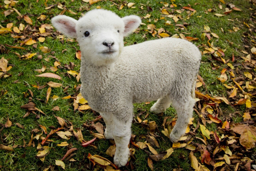

In [ ]:
download_url(search_images('lamb photos', max_images=1)[0], 'lamb.jpg', show_progress=False)
Image.open('lamb.jpg').to_thumb(256, 256)

In [ ]:
searches = 'kid_goat', 'lamb'
path = Path('goat_or_lamb')
from time import sleep

for o in searches:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f'{o} photo'))
  sleep(10)
  download_images(dest, urls=search_images(f'{o}  photo'))
  sleep(10)
  download_images(dest, urls=search_images(f'{o} shade photo'))
  sleep(10)
  resize_images(path/o, max_size=400, dest=path/o)

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:1015: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")


## Step 2: Train our model

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

33

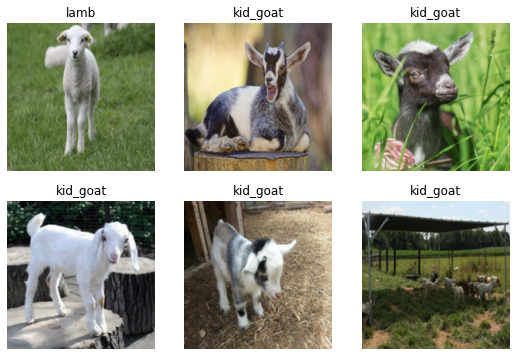

In [ ]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = [Resize(192, method='squish')]
).dataloaders(path)
dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.092726,0.304905,0.096447,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.347335,0.190154,0.050761,00:05
1,0.211069,0.155933,0.050761,00:04
2,0.140620,0.153519,0.050761,00:04


## Step 3: Use our model

In [ ]:
is_lamb,_,probs = learn.predict(PILImage.create('lamb.jpg'))
print(f"This is a: {is_lamb}.")
print(f"Probability it's a lamb: {probs[1]:.4f}")

This is a: lamb.
Probability it's a lamb: 0.9999


In [ ]:
is_goat,_,probs = learn.predict(PILImage.create('kid_goat.jpg'))
print(f"This is a {is_goat}")
print(f"Probability it`s a goat: {probs[0]:.4f}")

This is a kid_goat
Probability it`s a goat: 0.9980
